In [1]:
# For Gain Calibration at -109c/-110C, just use find and replace to change between \Downloads\Gain_-110C_0 to \Downloads\Gain_-110C

In [2]:
import numpy as np
from scipy import signal
from scipy.optimize import curve_fit
from scipy.signal import find_peaks
# from natsort import natsorted
import pandas as pd
from scipy.signal import butter, lfilter, freqz, filtfilt
from scipy.special import erfc

import pandas as pd
import glob
import matplotlib.pyplot as plt
plt.style.use('../../style.mplstyle')
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [3]:
import sys
sys.path.insert(0,'../../../purity-monitor/')
sys.path.insert(0,'../../WaveformAnalysis')

In [4]:
import Dataset as Dataset
import StandMonitor as Monitor
import PlotFunctions as Plt
import Waveform as Waveform
import SiPM as SiPM

In [5]:
import importlib
importlib.reload(Dataset)
importlib.reload(Monitor)
importlib.reload(Plt)
importlib.reload(SiPM)

<module 'SiPM' from '../../../purity-monitor\\SiPM.py'>

In [6]:
def gauss(x,a,mu,sigma):
    return (a*np.exp(-0.5*((x-mu)/sigma)**2))


In [7]:
def line_gain(x,m,c):
    return (m*x)+c

In [30]:
#Using the LV settings for the RedPitaya, 16384 bits correspond to a max of +-1 V. So total of 2 V for 16384 bits
calib_factor=(2/16384)*1000

print(600/16384)

0.03662109375


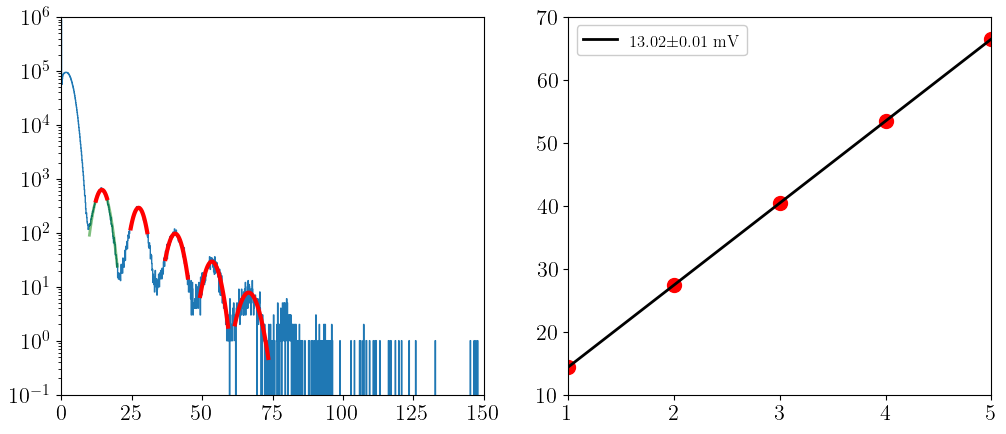

[13.022144993103074]
[0.009614586069651297]


In [9]:
gain_temp=[]
gain_list_273V=[]
gain_err_273V=[]
df=pd.read_csv(r"C:\Users\nEXO\Downloads\Gain_No_SRS_273\IN2-POS_29.5V.csv",skiprows=1)

hx=np.array(df['Channel']*calib_factor)
h=np.array(df['Counts'])
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.step(hx,h,lw=1)
cut=cut=np.where((hx>10) & (hx<20))
popt,pcov=curve_fit(gauss,hx[cut],h[cut],p0=[np.max(h[cut]),120,15],maxfev=10000)
plt.plot(hx[cut],gauss(hx[cut],*popt),color='green',label='Fit',lw=2,alpha=0.5)
plt.xlim(0,150)
plt.yscale('log')


for i in range (1,6):
    new_cut=np.where((hx[:-1]>popt[1]*i-(i*2)) & (hx[:-1]<popt[1]*i+(2)))
    popt_new,pcov_new=curve_fit(gauss,hx[new_cut],h[new_cut],p0=[np.max(h[new_cut]),popt[1]*i,15],maxfev=100000)
    plt.plot(hx[new_cut],gauss(hx[new_cut],*popt_new),color='r',label='Fit',lw=3)
    gain_temp.append(popt_new[1])
plt.subplot(1,2,2)
popt_temp,pcov_temp=curve_fit(line_gain,np.arange(1,6),gain_temp,p0=[12,10],maxfev=10000)
plt.plot(np.arange(1,6),line_gain(np.arange(1,6),*popt_temp),color='k',label=(str(np.round(popt_temp[0],2)))+'$\pm$'+str(np.round(np.sqrt(np.diag(pcov_temp))[0],2))+' mV')
plt.scatter(np.arange(1,6),gain_temp,color='r')
plt.legend(loc=2)
plt.show()
gain_list_273V.append(popt_temp[0])
gain_err_273V.append(np.sqrt(np.diag(pcov_temp))[0])
print(gain_list_273V)
print(gain_err_273V)

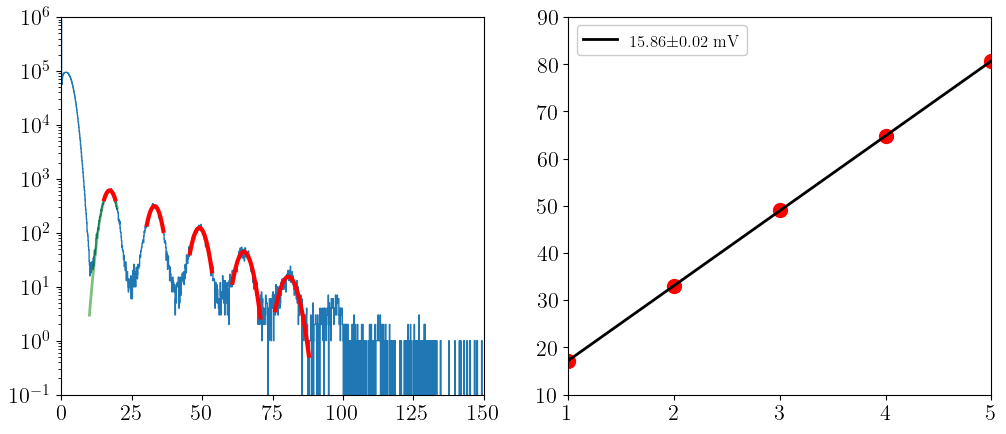

[13.022144993103074, 15.857876532882475]
[0.009614586069651297, 0.01806666552972939]


In [10]:
gain_temp=[]
df=pd.read_csv(r"C:\Users\nEXO\Downloads\Gain_No_SRS_273\IN2-POS_30V.csv",skiprows=1)

hx=np.array(df['Channel']*calib_factor)
h=np.array(df['Counts'])
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.step(hx,h,lw=1)
cut=cut=np.where((hx>10) & (hx<20))
popt,pcov=curve_fit(gauss,hx[cut],h[cut],p0=[np.max(h[cut]),120,15],maxfev=10000)
plt.plot(hx[cut],gauss(hx[cut],*popt),color='green',label='Fit',lw=2,alpha=0.5)
plt.xlim(0,150)
plt.yscale('log')


for i in range (1,6):
    new_cut=np.where((hx[:-1]>popt[1]*i-(i*2)) & (hx[:-1]<popt[1]*i+(2)))
    popt_new,pcov_new=curve_fit(gauss,hx[new_cut],h[new_cut],p0=[np.max(h[new_cut]),popt[1]*i,15],maxfev=100000)
    plt.plot(hx[new_cut],gauss(hx[new_cut],*popt_new),color='r',label='Fit',lw=3)
    gain_temp.append(popt_new[1])
plt.subplot(1,2,2)
popt_temp,pcov_temp=curve_fit(line_gain,np.arange(1,6),gain_temp,p0=[12,10],maxfev=10000)
plt.plot(np.arange(1,6),line_gain(np.arange(1,6),*popt_temp),color='k',label=(str(np.round(popt_temp[0],2)))+'$\pm$'+str(np.round(np.sqrt(np.diag(pcov_temp))[0],2))+' mV')
plt.scatter(np.arange(1,6),gain_temp,color='r')
plt.legend(loc=2)
plt.show()
gain_list_273V.append(popt_temp[0])
gain_err_273V.append(np.sqrt(np.diag(pcov_temp))[0])
print(gain_list_273V)
print(gain_err_273V)

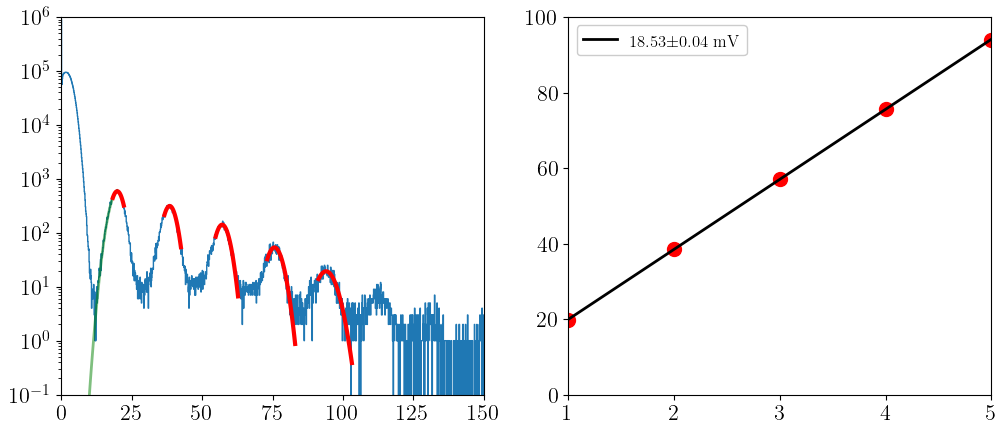

[13.022144993103074, 15.857876532882475, 18.534994582641144]
[0.009614586069651297, 0.01806666552972939, 0.03726238619056223]


In [11]:
gain_temp=[]
df=pd.read_csv(r"C:\Users\nEXO\Downloads\Gain_No_SRS_273\IN2-POS_30.5V.csv",skiprows=1)

hx=np.array(df['Channel']*calib_factor)
h=np.array(df['Counts'])
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.step(hx,h,lw=1)
cut=cut=np.where((hx>10) & (hx<20))
popt,pcov=curve_fit(gauss,hx[cut],h[cut],p0=[np.max(h[cut]),120,15],maxfev=10000)
plt.plot(hx[cut],gauss(hx[cut],*popt),color='green',label='Fit',lw=2,alpha=0.5)
plt.xlim(0,150)
plt.yscale('log')


for i in range (1,6):
    new_cut=np.where((hx[:-1]>popt[1]*i-(i*2)) & (hx[:-1]<popt[1]*i+(2)))
    popt_new,pcov_new=curve_fit(gauss,hx[new_cut],h[new_cut],p0=[np.max(h[new_cut]),popt[1]*i,15],maxfev=100000)
    plt.plot(hx[new_cut],gauss(hx[new_cut],*popt_new),color='r',label='Fit',lw=3)
    gain_temp.append(popt_new[1])
plt.subplot(1,2,2)
popt_temp,pcov_temp=curve_fit(line_gain,np.arange(1,6),gain_temp,p0=[12,10],maxfev=10000)
plt.plot(np.arange(1,6),line_gain(np.arange(1,6),*popt_temp),color='k',label=(str(np.round(popt_temp[0],2)))+'$\pm$'+str(np.round(np.sqrt(np.diag(pcov_temp))[0],2))+' mV')
plt.scatter(np.arange(1,6),gain_temp,color='r')
plt.legend(loc=2)
plt.show()
gain_list_273V.append(popt_temp[0])
gain_err_273V.append(np.sqrt(np.diag(pcov_temp))[0])
print(gain_list_273V)
print(gain_err_273V)

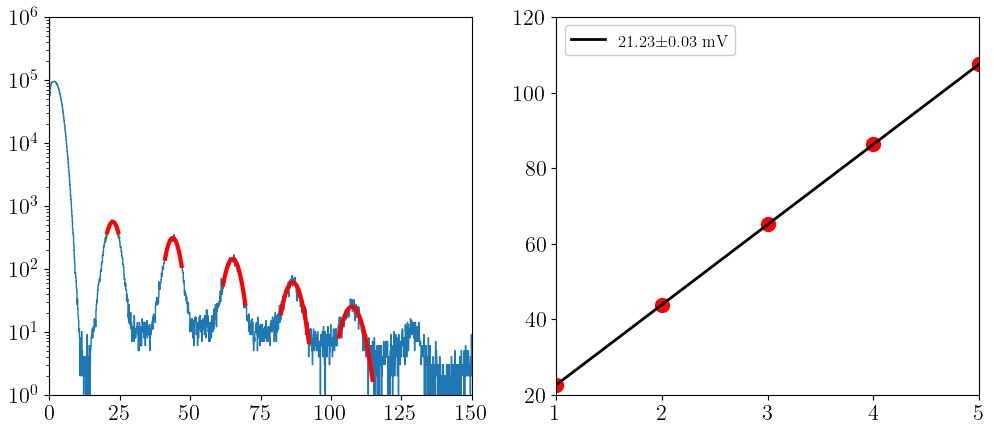

[13.022144993103074, 15.857876532882475, 18.534994582641144, 21.231035733217347]
[0.009614586069651297, 0.01806666552972939, 0.03726238619056223, 0.02773444592200472]


In [12]:

gain_temp=[]

df=pd.read_csv(r"C:\Users\nEXO\Downloads\Gain_No_SRS_273\IN2-POS_31V.csv",skiprows=1)

hx=np.array(df['Channel']*calib_factor)
h=np.array(df['Counts'])
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.step(hx,h,lw=1)
cut=cut=np.where((hx>20) & (hx<25))
popt,pcov=curve_fit(gauss,hx[cut],h[cut],p0=[np.max(h[cut]),120,15],maxfev=10000)
plt.plot(hx[cut],gauss(hx[cut],*popt),color='green',label='Fit',lw=2,alpha=0.5)
plt.xlim(0,150)
plt.yscale('log')


for i in range (1,6):
    new_cut=np.where((hx[:-1]>popt[1]*i-(i*2)) & (hx[:-1]<popt[1]*i+(2)))
    popt_new,pcov_new=curve_fit(gauss,hx[new_cut],h[new_cut],p0=[np.max(h[new_cut]),popt[1]*i,15],maxfev=100000)
    plt.plot(hx[new_cut],gauss(hx[new_cut],*popt_new),color='r',label='Fit',lw=3)
    gain_temp.append(popt_new[1])
plt.subplot(1,2,2)
popt_temp,pcov_temp=curve_fit(line_gain,np.arange(1,6),gain_temp,p0=[12,10],maxfev=10000)
plt.plot(np.arange(1,6),line_gain(np.arange(1,6),*popt_temp),color='k',label=(str(np.round(popt_temp[0],2)))+'$\pm$'+str(np.round(np.sqrt(np.diag(pcov_temp))[0],2))+' mV')
plt.scatter(np.arange(1,6),gain_temp,color='r')
plt.legend(loc=2)
plt.show()
gain_list_273V.append(popt_temp[0])
gain_err_273V.append(np.sqrt(np.diag(pcov_temp))[0])
print(gain_list_273V)
print(gain_err_273V)

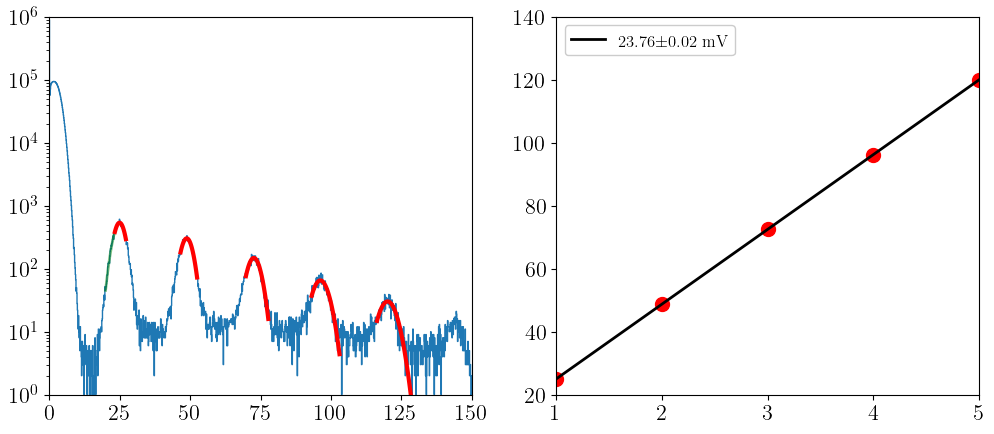

[13.022144993103074, 15.857876532882475, 18.534994582641144, 21.231035733217347, 23.76190693630167]
[0.009614586069651297, 0.01806666552972939, 0.03726238619056223, 0.02773444592200472, 0.021264432524755385]


In [13]:
gain_temp=[]

df=pd.read_csv(r"C:\Users\nEXO\Downloads\Gain_No_SRS_273\IN2-POS_31.5V.csv",skiprows=1)

hx=np.array(df['Channel']*calib_factor)
h=np.array(df['Counts'])
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.step(hx,h,lw=1)
cut=cut=np.where((hx>20) & (hx<25))
popt,pcov=curve_fit(gauss,hx[cut],h[cut],p0=[np.max(h[cut]),120,15],maxfev=10000)
plt.plot(hx[cut],gauss(hx[cut],*popt),color='green',label='Fit',lw=2,alpha=0.5)
plt.xlim(0,150)
plt.yscale('log')


for i in range (1,6):
    new_cut=np.where((hx[:-1]>popt[1]*i-(i*2)) & (hx[:-1]<popt[1]*i+(2)))
    popt_new,pcov_new=curve_fit(gauss,hx[new_cut],h[new_cut],p0=[np.max(h[new_cut]),popt[1]*i,15],maxfev=100000)
    plt.plot(hx[new_cut],gauss(hx[new_cut],*popt_new),color='r',label='Fit',lw=3)
    gain_temp.append(popt_new[1])
plt.subplot(1,2,2)
popt_temp,pcov_temp=curve_fit(line_gain,np.arange(1,6),gain_temp,p0=[12,10],maxfev=10000)
plt.plot(np.arange(1,6),line_gain(np.arange(1,6),*popt_temp),color='k',label=(str(np.round(popt_temp[0],2)))+'$\pm$'+str(np.round(np.sqrt(np.diag(pcov_temp))[0],2))+' mV')
plt.scatter(np.arange(1,6),gain_temp,color='r')
plt.legend(loc=2)
plt.show()
gain_list_273V.append(popt_temp[0])
gain_err_273V.append(np.sqrt(np.diag(pcov_temp))[0])
print(gain_list_273V)
print(gain_err_273V)

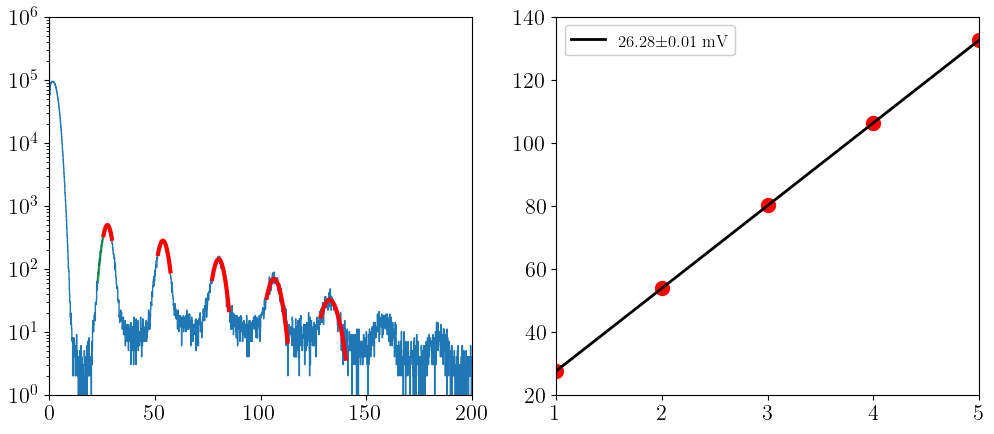

[13.022144993103074, 15.857876532882475, 18.534994582641144, 21.231035733217347, 23.76190693630167, 26.278289676572545]
[0.009614586069651297, 0.01806666552972939, 0.03726238619056223, 0.02773444592200472, 0.021264432524755385, 0.012574333767895955]


In [14]:
gain_temp=[]

df=pd.read_csv(r"C:\Users\nEXO\Downloads\Gain_No_SRS_273\IN2-POS_32V.csv",skiprows=1)

hx=np.array(df['Channel']*calib_factor)
h=np.array(df['Counts'])
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.step(hx,h,lw=1)
cut=cut=np.where((hx>23) & (hx<28))
popt,pcov=curve_fit(gauss,hx[cut],h[cut],p0=[np.max(h[cut]),120,15],maxfev=10000)
plt.plot(hx[cut],gauss(hx[cut],*popt),color='green',label='Fit',lw=2,alpha=0.5)
plt.xlim(0,200)
plt.yscale('log')


for i in range (1,6):
    new_cut=np.where((hx[:-1]>popt[1]*i-(i*2)) & (hx[:-1]<popt[1]*i+(2)))
    popt_new,pcov_new=curve_fit(gauss,hx[new_cut],h[new_cut],p0=[np.max(h[new_cut]),popt[1]*i,15],maxfev=100000)
    plt.plot(hx[new_cut],gauss(hx[new_cut],*popt_new),color='r',label='Fit',lw=3)
    gain_temp.append(popt_new[1])
plt.subplot(1,2,2)
popt_temp,pcov_temp=curve_fit(line_gain,np.arange(1,6),gain_temp,p0=[12,10],maxfev=10000)
plt.plot(np.arange(1,6),line_gain(np.arange(1,6),*popt_temp),color='k',label=(str(np.round(popt_temp[0],2)))+'$\pm$'+str(np.round(np.sqrt(np.diag(pcov_temp))[0],2))+' mV')
plt.scatter(np.arange(1,6),gain_temp,color='r')
plt.legend(loc=2)
plt.show()
gain_list_273V.append(popt_temp[0])
gain_err_273V.append(np.sqrt(np.diag(pcov_temp))[0])
print(gain_list_273V)
print(gain_err_273V)


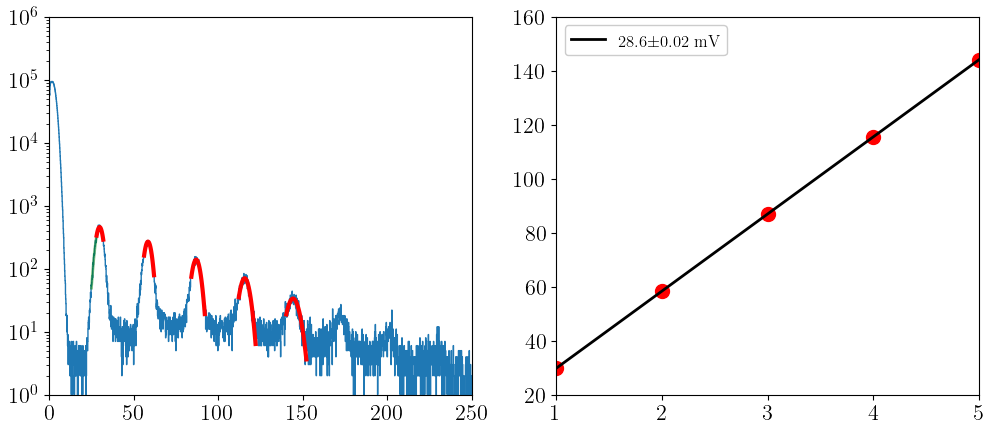

[13.022144993103074, 15.857876532882475, 18.534994582641144, 21.231035733217347, 23.76190693630167, 26.278289676572545, 28.603590893157847]
[0.009614586069651297, 0.01806666552972939, 0.03726238619056223, 0.02773444592200472, 0.021264432524755385, 0.012574333767895955, 0.015208929566665577]


In [15]:
gain_temp=[]

df=pd.read_csv(r"C:\Users\nEXO\Downloads\Gain_No_SRS_273\IN2-POS_32.5V.csv",skiprows=1)

hx=np.array(df['Channel']*calib_factor)
h=np.array(df['Counts'])
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.step(hx,h,lw=1)
cut=cut=np.where((hx>25) & (hx<30))
popt,pcov=curve_fit(gauss,hx[cut],h[cut],p0=[np.max(h[cut]),120,15],maxfev=10000)
plt.plot(hx[cut],gauss(hx[cut],*popt),color='green',label='Fit',lw=2,alpha=0.5)
plt.xlim(0,250)
plt.yscale('log')


for i in range (1,6):
    new_cut=np.where((hx[:-1]>popt[1]*i-(i*2)) & (hx[:-1]<popt[1]*i+(2)))
    popt_new,pcov_new=curve_fit(gauss,hx[new_cut],h[new_cut],p0=[np.max(h[new_cut]),popt[1]*i,15],maxfev=100000)
    plt.plot(hx[new_cut],gauss(hx[new_cut],*popt_new),color='r',label='Fit',lw=3)
    gain_temp.append(popt_new[1])
plt.subplot(1,2,2)
popt_temp,pcov_temp=curve_fit(line_gain,np.arange(1,6),gain_temp,p0=[12,10],maxfev=10000)
plt.plot(np.arange(1,6),line_gain(np.arange(1,6),*popt_temp),color='k',label=(str(np.round(popt_temp[0],2)))+'$\pm$'+str(np.round(np.sqrt(np.diag(pcov_temp))[0],2))+' mV')
plt.scatter(np.arange(1,6),gain_temp,color='r')
plt.legend(loc=2)
plt.show()
gain_list_273V.append(popt_temp[0])
gain_err_273V.append(np.sqrt(np.diag(pcov_temp))[0])
print(gain_list_273V)
print(gain_err_273V)


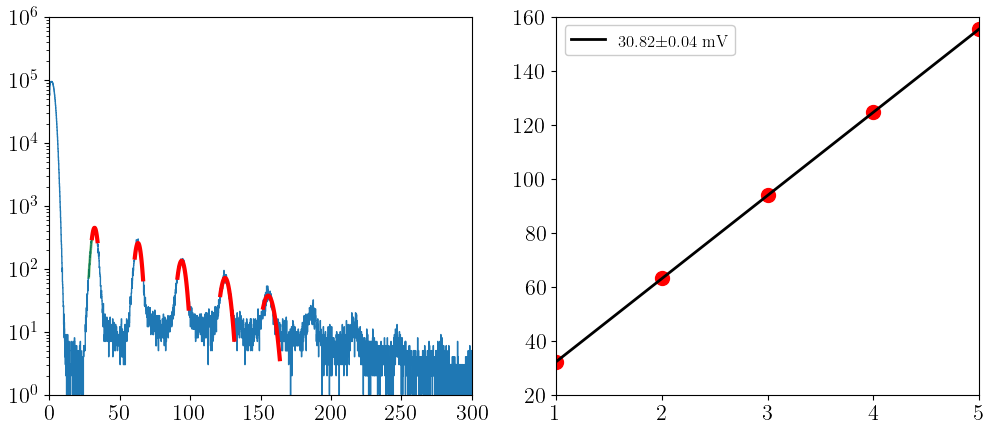

[13.022144993103074, 15.857876532882475, 18.534994582641144, 21.231035733217347, 23.76190693630167, 26.278289676572545, 28.603590893157847, 30.82435319884876]
[0.009614586069651297, 0.01806666552972939, 0.03726238619056223, 0.02773444592200472, 0.021264432524755385, 0.012574333767895955, 0.015208929566665577, 0.03973105222664964]


In [16]:
gain_temp=[]

df=pd.read_csv(r"C:\Users\nEXO\Downloads\Gain_No_SRS_273\IN2-POS_33V.csv",skiprows=1)

hx=np.array(df['Channel']*calib_factor)
h=np.array(df['Counts'])
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.step(hx,h,lw=1)
cut=cut=np.where((hx>28) & (hx<33))
popt,pcov=curve_fit(gauss,hx[cut],h[cut],p0=[np.max(h[cut]),120,15],maxfev=10000)
plt.plot(hx[cut],gauss(hx[cut],*popt),color='green',label='Fit',lw=2,alpha=0.5)
plt.xlim(0,300)
plt.yscale('log')


for i in range (1,6):
    new_cut=np.where((hx[:-1]>popt[1]*i-(i*2)) & (hx[:-1]<popt[1]*i+(2)))
    popt_new,pcov_new=curve_fit(gauss,hx[new_cut],h[new_cut],p0=[np.max(h[new_cut]),popt[1]*i,15],maxfev=100000)
    plt.plot(hx[new_cut],gauss(hx[new_cut],*popt_new),color='r',label='Fit',lw=3)
    gain_temp.append(popt_new[1])
plt.subplot(1,2,2)
popt_temp,pcov_temp=curve_fit(line_gain,np.arange(1,6),gain_temp,p0=[12,10],maxfev=10000)
plt.plot(np.arange(1,6),line_gain(np.arange(1,6),*popt_temp),color='k',label=(str(np.round(popt_temp[0],2)))+'$\pm$'+str(np.round(np.sqrt(np.diag(pcov_temp))[0],2))+' mV')
plt.scatter(np.arange(1,6),gain_temp,color='r')
plt.legend(loc=2)
plt.show()
gain_list_273V.append(popt_temp[0])
gain_err_273V.append(np.sqrt(np.diag(pcov_temp))[0])
print(gain_list_273V)
print(gain_err_273V)

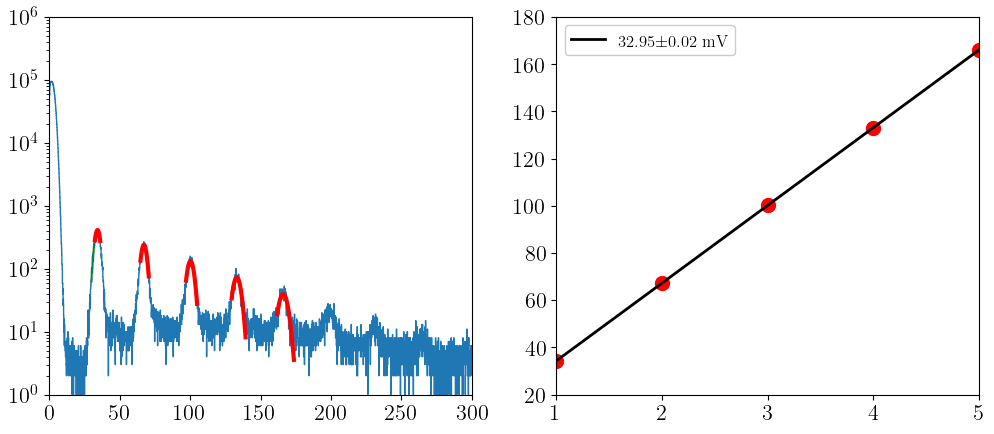

[13.022144993103074, 15.857876532882475, 18.534994582641144, 21.231035733217347, 23.76190693630167, 26.278289676572545, 28.603590893157847, 30.82435319884876, 32.94684101671112]
[0.009614586069651297, 0.01806666552972939, 0.03726238619056223, 0.02773444592200472, 0.021264432524755385, 0.012574333767895955, 0.015208929566665577, 0.03973105222664964, 0.017855498365266047]


In [17]:
gain_temp=[]

df=pd.read_csv(r"C:\Users\nEXO\Downloads\Gain_No_SRS_273\IN2-POS_33.5V.csv",skiprows=1)

hx=np.array(df['Channel']*calib_factor)
h=np.array(df['Counts'])
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.step(hx,h,lw=1)
cut=cut=np.where((hx>30) & (hx<35))
popt,pcov=curve_fit(gauss,hx[cut],h[cut],p0=[np.max(h[cut]),120,15],maxfev=10000)
plt.plot(hx[cut],gauss(hx[cut],*popt),color='green',label='Fit',lw=2,alpha=0.5)
plt.xlim(0,300)
plt.yscale('log')


for i in range (1,6):
    new_cut=np.where((hx[:-1]>popt[1]*i-(i*2)) & (hx[:-1]<popt[1]*i+(2)))
    popt_new,pcov_new=curve_fit(gauss,hx[new_cut],h[new_cut],p0=[np.max(h[new_cut]),popt[1]*i,15],maxfev=100000)
    plt.plot(hx[new_cut],gauss(hx[new_cut],*popt_new),color='r',label='Fit',lw=3)
    gain_temp.append(popt_new[1])
plt.subplot(1,2,2)
popt_temp,pcov_temp=curve_fit(line_gain,np.arange(1,6),gain_temp,p0=[12,10],maxfev=10000)
plt.plot(np.arange(1,6),line_gain(np.arange(1,6),*popt_temp),color='k',label=(str(np.round(popt_temp[0],2)))+'$\pm$'+str(np.round(np.sqrt(np.diag(pcov_temp))[0],2))+' mV')
plt.scatter(np.arange(1,6),gain_temp,color='r')
plt.legend(loc=2)
plt.show()
gain_list_273V.append(popt_temp[0])
gain_err_273V.append(np.sqrt(np.diag(pcov_temp))[0])
print(gain_list_273V)
print(gain_err_273V)

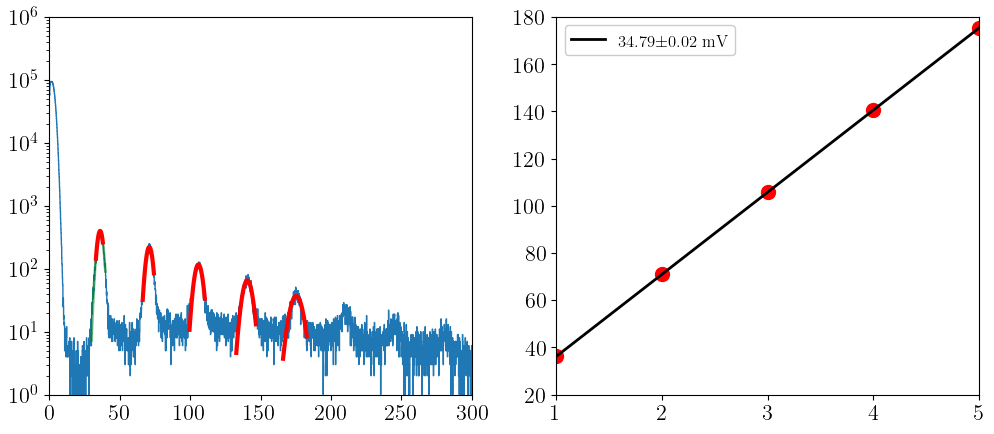

[13.022144993103074, 15.857876532882475, 18.534994582641144, 21.231035733217347, 23.76190693630167, 26.278289676572545, 28.603590893157847, 30.82435319884876, 32.94684101671112, 34.793991083534436]
[0.009614586069651297, 0.01806666552972939, 0.03726238619056223, 0.02773444592200472, 0.021264432524755385, 0.012574333767895955, 0.015208929566665577, 0.03973105222664964, 0.017855498365266047, 0.022815655991119094]


In [18]:
gain_temp=[]

df=pd.read_csv(r"C:\Users\nEXO\Downloads\Gain_No_SRS_273\IN2-POS_34V.csv",skiprows=1)

hx=np.array(df['Channel']*calib_factor)
h=np.array(df['Counts'])
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.step(hx,h,lw=1)
cut=cut=np.where((hx>30) & (hx<40))
popt,pcov=curve_fit(gauss,hx[cut],h[cut],p0=[np.max(h[cut]),120,15],maxfev=10000)
plt.plot(hx[cut],gauss(hx[cut],*popt),color='green',label='Fit',lw=2,alpha=0.5)
plt.xlim(0,300)
plt.yscale('log')


for i in range (1,6):
    new_cut=np.where((hx[:-1]>popt[1]*i-(i*3)) & (hx[:-1]<popt[1]*i+(2)))
    popt_new,pcov_new=curve_fit(gauss,hx[new_cut],h[new_cut],p0=[np.max(h[new_cut]),popt[1]*i,15],maxfev=100000)
    plt.plot(hx[new_cut],gauss(hx[new_cut],*popt_new),color='r',label='Fit',lw=3)
    gain_temp.append(popt_new[1])
plt.subplot(1,2,2)
popt_temp,pcov_temp=curve_fit(line_gain,np.arange(1,6),gain_temp,p0=[12,10],maxfev=10000)
plt.plot(np.arange(1,6),line_gain(np.arange(1,6),*popt_temp),color='k',label=(str(np.round(popt_temp[0],2)))+'$\pm$'+str(np.round(np.sqrt(np.diag(pcov_temp))[0],2))+' mV')
plt.scatter(np.arange(1,6),gain_temp,color='r')
plt.legend(loc=2)
plt.show()
gain_list_273V.append(popt_temp[0])
gain_err_273V.append(np.sqrt(np.diag(pcov_temp))[0])
print(gain_list_273V)
print(gain_err_273V)

In [27]:
%store -r gain_list_0V_LXe_SRS gain_list_273V_LXe_SRS gain_err_0V_LXe_SRS gain_err_273V_LXe_SRS

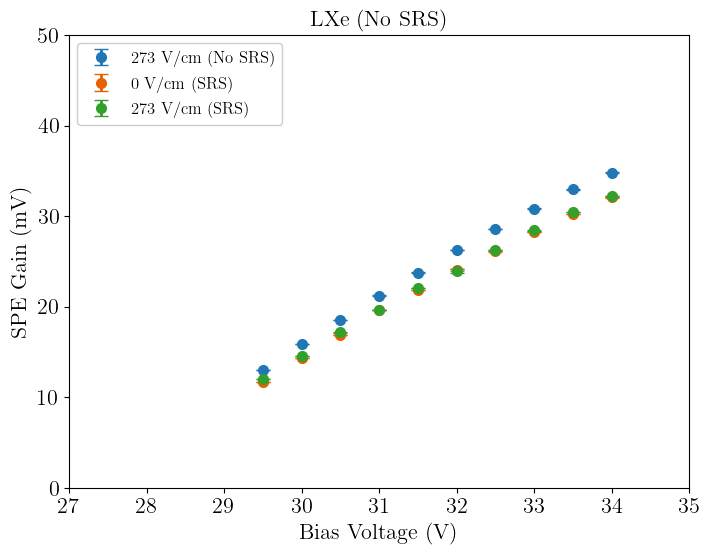

In [29]:
def line(x,a,b):
    return a*(x-b)
x_data=np.arange(0,100,1)
BV_list=[29.5,30,30.5,31,31.5,32,32.5,33,33.5,34]
BV_list=np.array(BV_list)
gain_list_273V=np.array(gain_list_273V)
gain_err_273V=np.array(gain_err_273V)
plt.errorbar(BV_list,gain_list_273V,yerr=gain_err_273V,label='273 V/cm (No SRS)',fmt='o',ms=7)
plt.errorbar(BV_list,gain_list_0V_LXe_SRS,yerr=gain_err_0V_LXe_SRS,label='0 V/cm (SRS)',fmt='o',ms=7)
plt.errorbar(BV_list,gain_list_273V_LXe_SRS,yerr=gain_err_273V_LXe_SRS,label='273 V/cm (SRS)',fmt='o',ms=7)


popt_273,pcov_273=curve_fit(line,BV_list,gain_list_273V,p0=[31,27],sigma=gain_err_273V)
# plt.plot(x_data,line(x_data,*popt_273),color=colors[1])#,label='BV= '+str(np.round(popt_273[1],2))+ '$\pm$'+ str(np.round(np.sqrt(np.diag(pcov_273)[1]),2))+' V',ls='--')
plt.ylabel('SPE Gain (mV)')
plt.xlabel('Bias Voltage (V)')
plt.title('LXe (No SRS)')
plt.xlim(27,35)
plt.ylim(0,50)
plt.legend(loc=2)
plt.savefig('BV_Comparison_lxe.pdf')
plt.show()
